In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
def get_data(npzfile):
    tar_data = np.load(npzfile, allow_pickle=True)['trajs']
    if npzfile.endswith("ODE.npz"):
        tar_data = tar_data[np.newaxis, ...]
    traj_num0 = tar_data.shape[0]
    traj_num1 = tar_data.shape[1]
    agent_num = tar_data[0,0]['rmse_pos'].shape[1]
    # print('traj num: {}'.format(traj_num0 * traj_num1 * agent_num))
    s2 = 0
    logit2, lat2 = 0, 0
    leng = traj_num0 * traj_num1 * agent_num
    for i in range(traj_num0):
        for j in range(traj_num1):
            for k in range(agent_num):
                try:
                    s2 += tar_data[i, j]['rmse_pos'][:, k]**2
                    logit2 += (tar_data[i, j]['y'][:, k] - tar_data[i, j]['orig_y'][:, k])**2
                    lat2 += (tar_data[i, j]['x'][:, k] - tar_data[i, j]['orig_x'][:, k])**2
                except:
                    leng -= 1

    s2 /= leng
    s2 = np.sqrt(s2)
    lat2 /= leng
    logit2 /= leng

    std2 = np.zeros([25, 1])
    for i in range(25):
        stepi = np.array([tar_data[k, j]['rmse_pos'][i, g] for k in range(traj_num0) for j in range(traj_num1) for g in range(agent_num)])
        std2[i] = np.std(stepi)

    print('@2.5sec / longitudinal: {:.2f}, lateral: {:.2f}, Total: {:.2f}'.format(np.sqrt(logit2)[25], np.sqrt(lat2)[25], s2[25]))

    return s2, lat2, logit2, std2

###  AGen  ###
@2.5sec / longitudinal: 1.64, lateral: 1.89, Total: 2.51
###  cLODE 5 obseravations  ###
@2.5sec / longitudinal: 1.44, lateral: 1.64, Total: 2.18
###  cLODE 10 obseravations  ###
@2.5sec / longitudinal: 1.47, lateral: 1.70, Total: 2.25
###  cLODE 20 obseravations  ###
@2.5sec / longitudinal: 1.45, lateral: 1.70, Total: 2.24
###  cLODE 50 obseravations  ###


KeyboardInterrupt: 

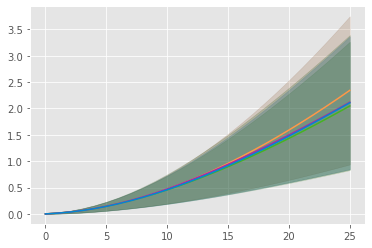

In [3]:
n_agents = 22
file_names=[
    'trajdata_i101_22agents_AGen.npz',
    '5observations_22agents_cLatentODE.npz',
    '10observations_22agents_cLatentODE.npz',
    '20observations_22agents_cLatentODE.npz',
    '50observations_22agents_cLatentODE.npz',
    '100observations_22agents_cLatentODE.npz'
    ]   
name_data=[
    'AGen', 
    'cLODE 5 obseravations', 
    'cLODE 10 obseravations', 
    'cLODE 20 obseravations', 
    'cLODE 50 obseravations',
    'cLODE 100 obseravations'
    ]
colors_line = [
    '#FF9848', 
    '#46b322', 
    '#b322a2', 
    '#0288d1',
    '#e62712',
    '#32fce5'
    ]
colors_std = [
    '#875026',
    '#2d7515',
    '#1f520e',
    '#035887',
    '#991a0c',
    '#1fa192'
    ]

plot_flag = 2 # 0: AGen V.S. cLODE 5 obs, 1: cLODE ablation, else: compare all the results
if plot_flag==0:
    file_names = file_names[:2]
    name_data = name_data[:2]
    colors_line = colors_line[:2]
    colors_std = colors_std[:2]
elif plot_flag==1:
    file_names = file_names[1:]
    name_data = name_data[1:]
    colors_line = colors_line[1:]
    colors_std = colors_std[1:]

n_files = len(file_names)

s_s = []
for i in range(n_files): # n_files
    print('### ', name_data[i], ' ###')
    # s, lat, long, std = get_data('pretrained/' + file_names[i])
    s, lat, long, std = get_data('/root/cLODE/simulation_results/' + file_names[i])
    s_s.append(s)
    s25 = s[:25, np.newaxis]
    s25 = np.concatenate([np.zeros([1,1]), s25], 0)
    std = np.concatenate([np.zeros([1,1]), std], 0)
    plt.plot(range(26), s25, label=name_data[i], color=colors_line[i])
    plt.fill_between(range(26), np.squeeze(s25-std), np.squeeze(s25+std), alpha=0.2, color=colors_std[i])

plt.legend(name_data, loc='upper left')
plt.xlabel("Time Step [-]")
plt.ylabel('RMSE [m]')
plt.title("{} agents prediction on NGSIM".format(n_agents))


from tikzplotlib import save as tikz_save

tikz_save("22agent.tex")

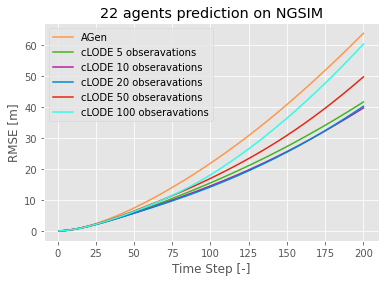

In [65]:
n_agents = 22
step = 200
for i in range(n_files):
    plt.plot(range(1, step+1), s_s[i], label=name_data[i], color=colors_line[i])        

plt.legend(name_data, loc='upper left')
plt.xlabel("Time Step [-]")
plt.ylabel('RMSE [m]')
plt.title("{} agents prediction on NGSIM".format(n_agents))

from tikzplotlib import save as tikz_save

tikz_save("22agent200step.tex")